# FY2045 Quantum Mechanics - Numerical Exercise
Marte K. Høiskar and Maren Lium

## Problem 1

**Task:**
Calculate initial values for $\Psi _I (x, t)$ and $\Psi _R(x, t+\frac{\Delta t}{2})$ using Eq. (8). Normalise the wave function such that

\begin{equation}
\int_{0}^{L} |\Psi (x, t)|^2 \text{d}x = 1.
\end{equation}

Make a plot of the real and imaginary parts of Ψ, selecting suitable values for ∆x,
xs and σx to make your figure look similar to Figure 1. Make sure ∆x is small
enough that each oscillation of the wave function is resolved by enough points to
look fairly smooth. Furthermore, make a plot of the probability density for finding
the particle represented by the wave packet, given by $|Ψ(x, t)|^2$.

#### Solution:
Expanding Eq. (8) produce one real and one imaginary part,

\begin{equation}
\Psi (x, t) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}e^{i(k_0x-\omega t)} = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}(\cos(k_0x-\omega t)+i\sin(k_0x-\omega t)).
\end{equation}

Hence, 

\begin{equation}
\Psi_I (x, t) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\sin(k_0x-\omega t))
\quad\text{and}\quad
\Psi_R \left(x, t + \frac{\Delta t}{2}\right) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\cos\left(k_0x-\omega \left(t+\frac{\Delta t}{2}\right)\right).
\end{equation}

The initial values for $\Psi _I (x, t)$ and $\Psi _R(x, t+\frac{\Delta t}{2})$ are

\begin{equation}
\Psi_I (x, 0) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\sin(k_0x)
\quad\text{and}\quad
\Psi_R \left(x, \frac{\Delta t}{2}\right) = Ce^{\frac{(x-x_s)^2}{2{\sigma_x}^2}}\cos\left(k_0x-\omega \frac{\Delta t}{2}\right).
\end{equation}

In order for the wave function to be normalized, such that 

\begin{equation}
\int_{0}^{L} |\Psi (x, t)|^2 \text{d}x = 1,
\end{equation}

the normalization constant needs to be determined.

\begin{equation}
1 = \int_{0}^{L} \left|\Psi (x, t)\right|^2 \text{d}x = \int_{0}^{L} C^2 e^{-\frac{(x-x_s)^2}{{\sigma_x}^2}} \text{d}x,

C^2 = \frac{1} { \int_{0}^{L} e^{-\frac{(x-x_s)^2}{{\sigma_x}^2}} \text{d}x}.
\end{equation}

This expression can be solved numerically.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

L = 20
n = 1000
x_s = 5
k_0 = 20
sigma_x = 1.5
omega = 1

C = 0.0868


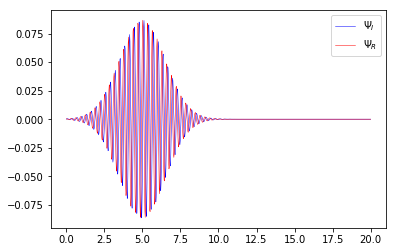

In [6]:
x = np.linspace(0, L, n)

integral = np.sum(np.exp(-(x-x_s)**2 / sigma_x**2))
C = 1/np.sqrt(integral)

print(f"C = {C:.3}")

def psi_i(x, t = 0):
    return C * np.exp(-(x-x_s)**2/(2*sigma_x**2)) * np.sin(k_0*x - omega*t)


def psi_r(x, t = 0):
    return C * np.exp(-(x - x_s) ** 2 / (2 * sigma_x ** 2)) * np.cos(k_0 * x - omega * t)


# PLOT OF PSI_I AND PSI_R

plt.figure("figure_1")
plt.plot(x, psi_i(x), "b-", label=r'$\Psi_{I}$', linewidth=0.5)
plt.plot(x, psi_r(x), "r-", label=r'$\Psi_{R}$', linewidth=0.5)
plt.legend()
plt.show()

## Problem 2

#### Task:
Start out a wave packet at $x_s = 5$, and propagate it a distance $\frac{L}{2}=10$, i.e., until it reaches $x = 15$. This will take a time $T = \frac{L}{2v_g}$, where $v_g$, given by 

\begin{equation}
v_g = \frac{\partial\omega}{\partial k}
\end{equation}

is the group velocity at the wave number k0. Repeat this procedure for different values of σx, for example $\sigma_x = 0.5$, $\sigma_x = 1.0$ and $\sigma_x = 2.0$. Describe what happens,and produce a figure that shows the initial probability density $|\Psi (x, t)|^2$ centered on $x_s = 5$, and the same for the propagated wave centered on $x = 15$, for two
different $\sigma_x$, for example $\sigma_x$ = 1.5 and $\sigma_x$ = 0.5.

To successfully carry out this computation, you will need to choose ∆t as described in the section on numerical stability. Begin by choosing a very small number, for example 100 times smaller than the limit. Propagate the wave function a few timesteps, and plot the results. See if you can increase $\Delta t$ somewhat, as that will make the computations go faster. Describe what happens if you increase $\Delta t$ too much. For the rest of the problems, choose a value for $\Delta t$ which is somewhat smaller than the largest value you found to work.

Note that the computations required for this problem should take no more than a few seconds of computer time.

#### Solution:

In [ ]:
delta_t = 

## Problem 3

Introduce a barrier of width $l = \frac{L}{50}$ and height $V_0 = \frac{E}{2}$ in the middle of the domain by setting $V(x)$ to

\begin{equation}
V(x)=\begin{cases}
    \frac{E}{2} & \text{if $\frac{L}{2} - \frac{l}{2} < x < \frac{L}{2} + \frac{l}{2}$}.\\
    0 & \text{otherwise}
  \end{cases}
\end{equation}

Propagate a wave packet across the barrier. You can use the same T that you found in Problem 2. Produce a plot which shows that the wave function has been partially transmitted, partially reflected. Calculate the probability of reflection and transmission by calculating

\begin{equation}
\int_{0}^{\frac{L}{2}}|\Psi (x, t)|^2 dx 
\quad\text{and}\quad
\int_{\frac{L}{2}}^{L}|\Psi (x, t)|^2 dx. 
\end{equation}

You should confirm that T is large enough that the wave packet has completely cleared the barrier, i.e, your plot should look similar to Figure 2.

## Problem 4

Using the same procedure as in Problem 3, calculate the probabilities of transmission an reflection for 50 different barrier heights V0 from 0E to $\frac{3E}{2}$. Make a graph showing the probabilities of reflection and transmission as a function of $E/V_0$.

## Problem 5

Using a barrier height of $\frac{9E}{10}$, calculate the probabilities of transmission and reflection for 50 different barrier widths from 0 to $L/20$. Make a graph showing the probabilities of reflection and transmission as a function of barrier width. Note that you will have to use $N_x = 1000$ or larger to be able to resolve all the different barrier thicknesses.